## Step 5: a4 Feature Analysis
##### Use modules built for a2 and a7 (evolve if necessary)

In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
sys.path.append('../utils')
import DataAggregation as da
import AlgoUtils as au
cmap_bold = ListedColormap(['#00FF00','#FF0000'])

In [2]:
dd = da.GetFrames("../data/device_failure.csv", "a4", ldays=-30, lday_strict=False)

### Features ldays, lday_strict were added after I went through analysis few times.
### Unlike a2 and a7, Failures with a4 are not that dramatic.
### For a2, a7: Getting log & log differential metrics for last 10 days was sufficient.
#### ldays = -30: For a4, increasing N (last N days) to 30 is giving better results
#### lday_strict=False: Look at log range for entire year

/home/vagrant/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/vagrant/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


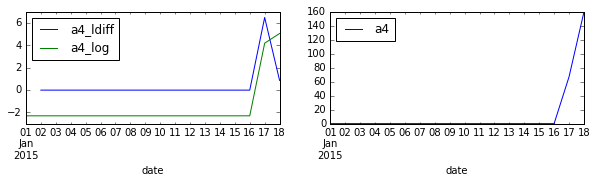

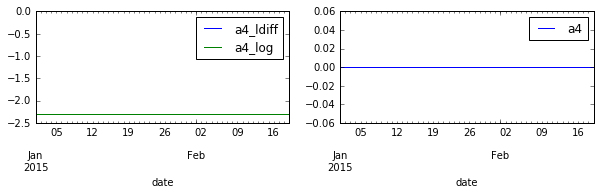

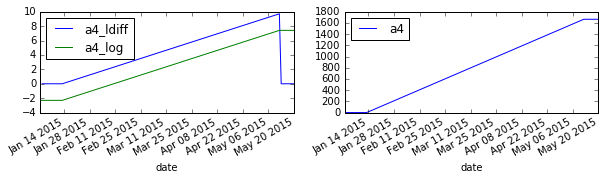

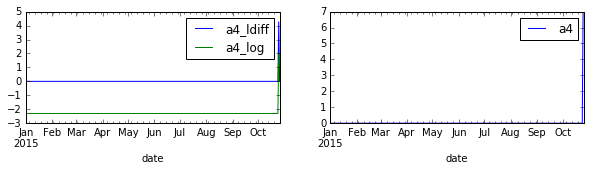

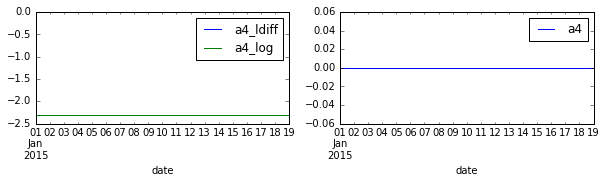

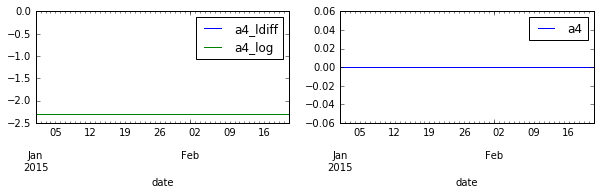

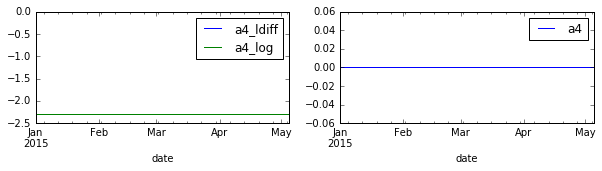

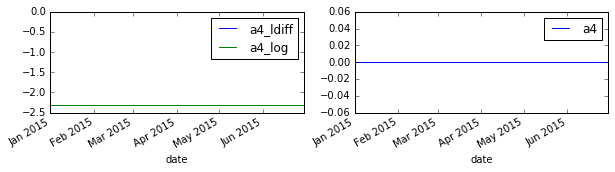

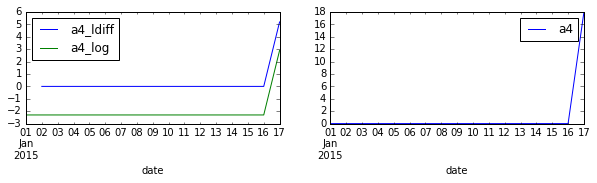

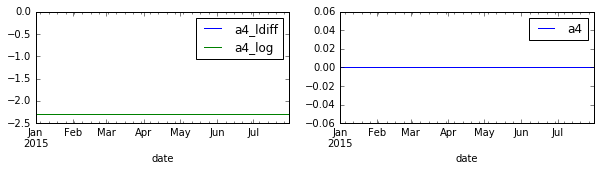

In [3]:
dd.plot_sample_history(dd.failed_devs["device"],10)

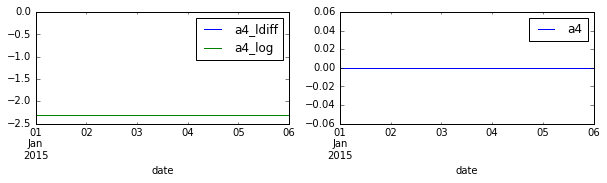

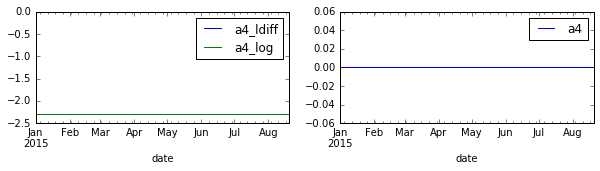

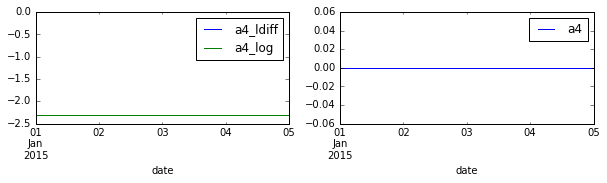

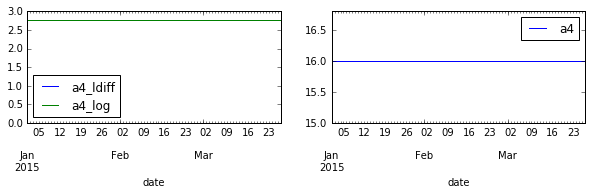

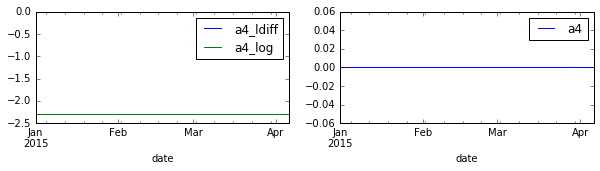

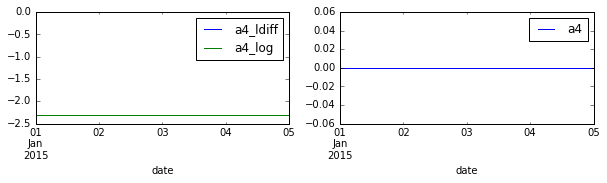

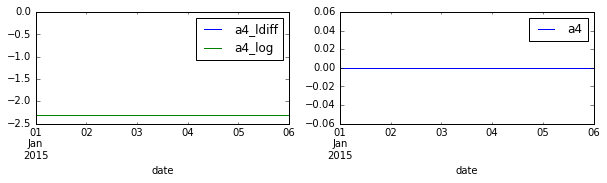

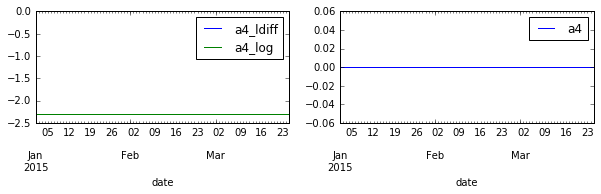

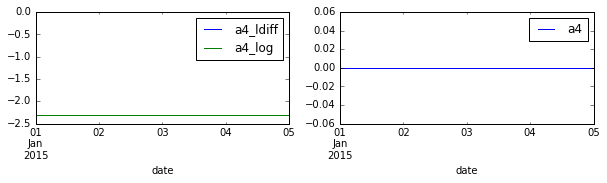

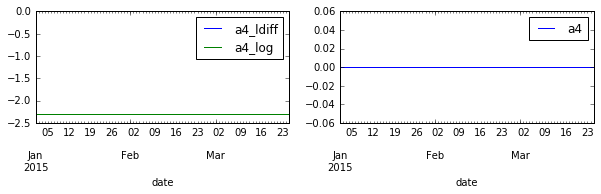

In [4]:
dd.plot_sample_history(dd.good_devs["device"],10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f981d981bd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f981e3dd610>]], dtype=object)

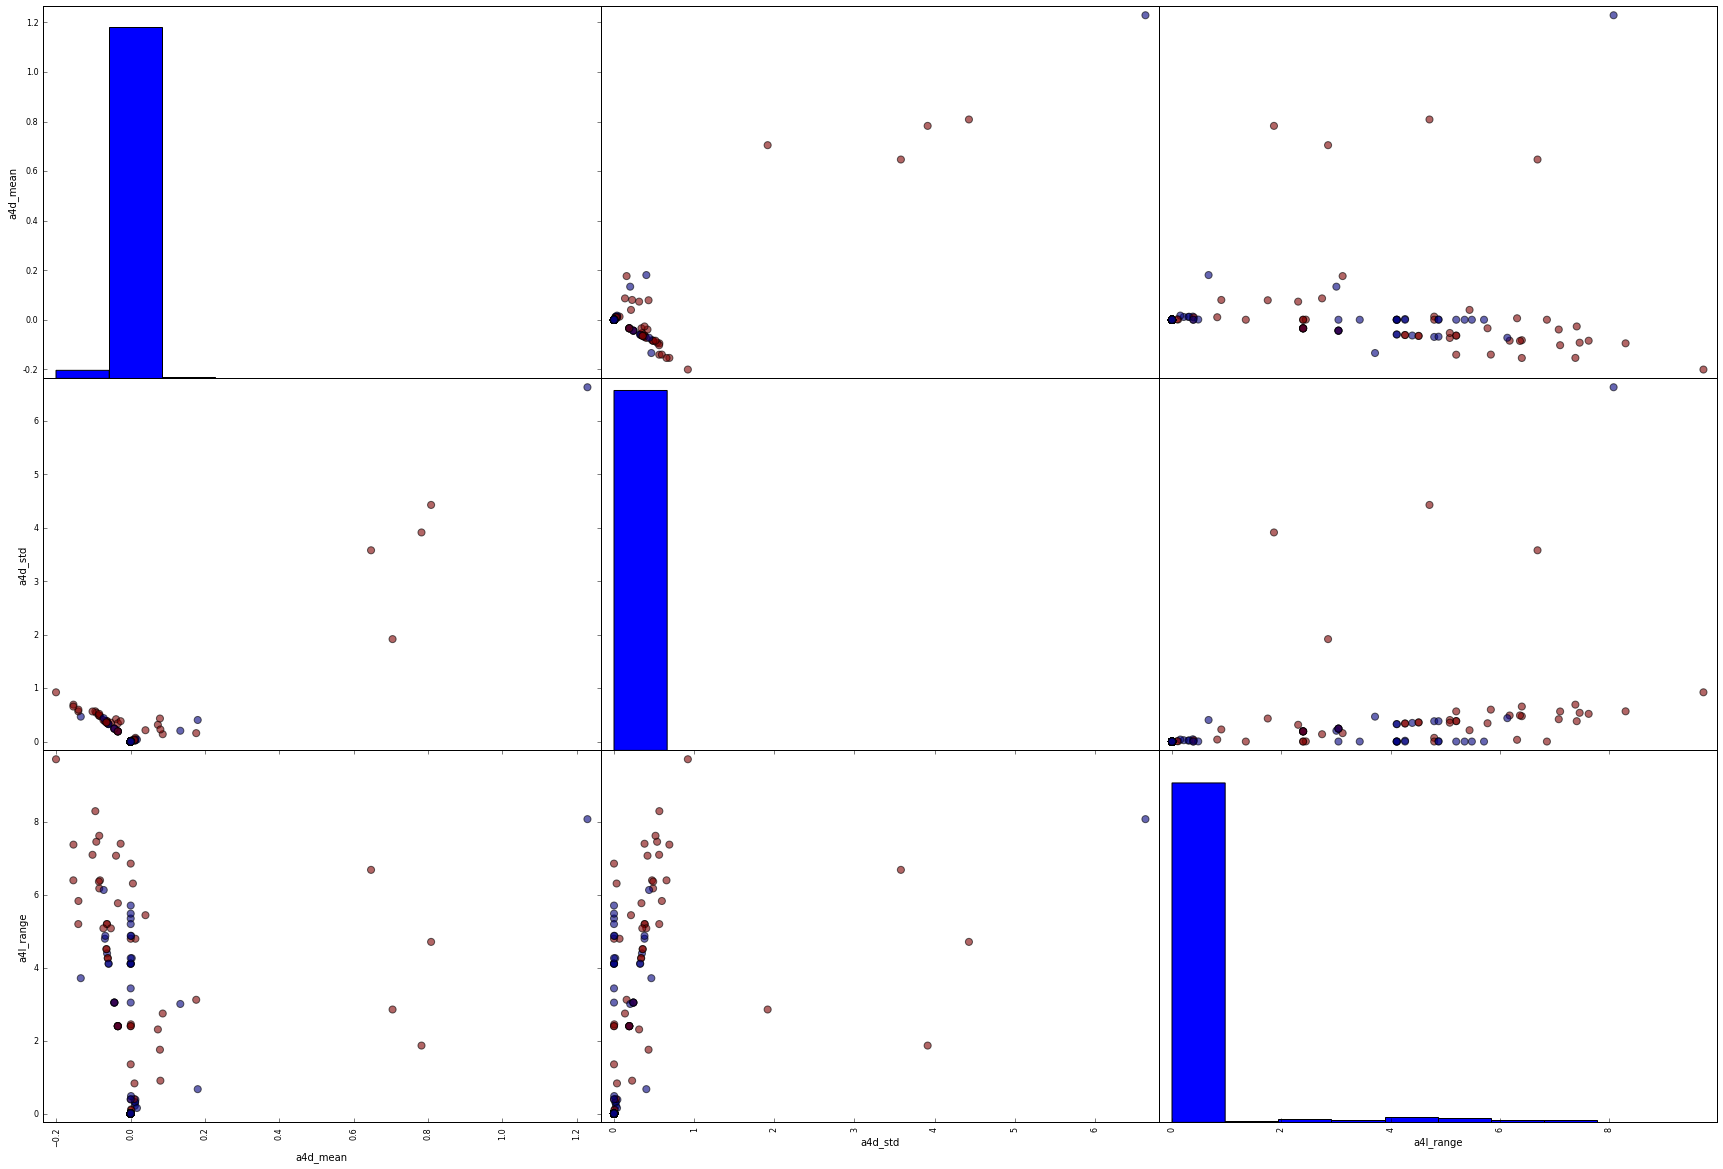

In [5]:
sfeature = dd.sfeature
fcols_tmp = [sfeature +"d_mean", sfeature +"d_std", sfeature +"l_range"]
df_sfeature = dd.df_sfeature
pd.scatter_matrix(df_sfeature[fcols_tmp], figsize=(30,20), s=200, c=df_sfeature["failure"], alpha=0.6)

#### Decent! See seperation between good and bad devices.

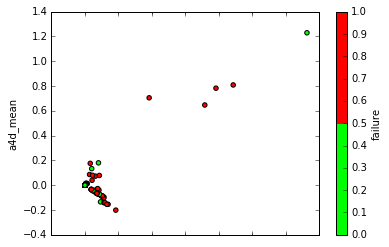

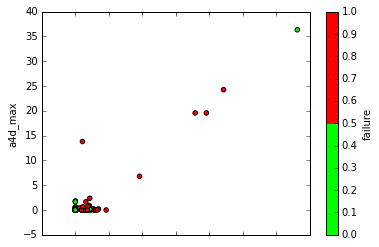

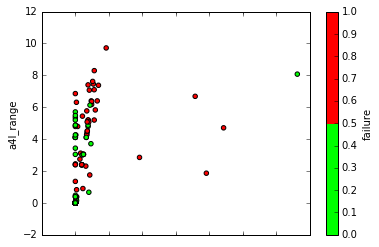

In [6]:
df_sfeature.plot(kind='scatter', x=sfeature+'d_std', y=sfeature+"d_mean", c="failure", colormap=cmap_bold)
df_sfeature.plot(kind='scatter', x=sfeature+'d_std', y=sfeature+"d_max", c="failure", colormap=cmap_bold)
df_sfeature.plot(kind='scatter', x=sfeature+'d_std', y=sfeature+"l_range", c="failure", colormap=cmap_bold)

### Last graph above a4d_std Vs a4l_lrange is interesting
### Note the lack of good devices that have a4l_range between 1 and 3
### Almost feel like there are 2 classes of devices: TBD

In [7]:
algos_dd = {
    "LogisticRegression": {"C": 1e9},
    "LogisticRegressionB": {"C": 1e9, "class_weight":'balanced'},
    "KNeighborsClassifier": {"n_neighbors": 7},
    "LinearDiscriminantAnalysis": {},
    "QuadraticDiscriminantAnalysis": {}
}

fcols = ["d_mean:d_std:d_max:l_range",
         "d_mean:d_std:l_range",
         "d_std:l_range",
         "l_range",
         "d_std",
         "d_max"]
algos_str = ["LogisticRegression", 
             "LogisticRegressionB", 
             "KNeighborsClassifier",
             "LinearDiscriminantAnalysis",
             "QuadraticDiscriminantAnalysis"]

In [8]:
df_sfeature = dd.df_sfeature
sfeature = dd.sfeature
df_results = au.run_algo_analysis(df_sfeature, sfeature, fcols, algos_str, algos_dd)

/home/vagrant/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/vagrant/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


----------
LogisticRegression:d_mean:d_std:d_max:l_range
Cross-val-score(roc_auc) = 0.72
Cross-val-score(accuracy) = 0.92
Cross-val-score(recall)   = 0.25
Cross-val-score(precision)= 0.57
Cross-val-score(f1)       = 0.57
----------
LogisticRegressionB:d_mean:d_std:d_max:l_range
Cross-val-score(roc_auc) = 0.72
Cross-val-score(accuracy) = 0.93
Cross-val-score(recall)   = 0.44
Cross-val-score(precision)= 0.61
Cross-val-score(f1)       = 0.61
----------
KNeighborsClassifier:d_mean:d_std:d_max:l_range
Cross-val-score(roc_auc) = 0.72
Cross-val-score(accuracy) = 0.93
Cross-val-score(recall)   = 0.34
Cross-val-score(precision)= 0.70
Cross-val-score(f1)       = 0.70
----------
LinearDiscriminantAnalysis:d_mean:d_std:d_max:l_range
Cross-val-score(roc_auc) = 0.72
Cross-val-score(accuracy) = 0.92
Cross-val-score(recall)   = 0.33
Cross-val-score(precision)= 0.53
Cross-val-score(f1)       = 0.53
----------
QuadraticDiscriminantAnalysis:d_mean:d_std:d_max:l_range
Cross-val-score(roc_auc) = 0.71
Cross

In [9]:
df_results

,fcols,algo,recall,precision,f1,roc_auc,accuracy
6,d_mean:d_std:l_range,LogisticRegressionB,0.46,0.61,0.50,0.73,0.93
11,d_std:l_range,LogisticRegressionB,0.46,0.61,0.50,0.73,0.93
16,l_range,LogisticRegressionB,0.46,0.61,0.50,0.73,0.93
1,d_mean:d_std:d_max:l_range,LogisticRegressionB,0.44,0.61,0.49,0.72,0.93
9,d_mean:d_std:l_range,QuadraticDiscriminantAnalysis,0.43,0.58,0.47,0.73,0.93
14,d_std:l_range,QuadraticDiscriminantAnalysis,0.42,0.59,0.47,0.73,0.93
19,l_range,QuadraticDiscriminantAnalysis,0.41,0.59,0.46,0.73,0.92
4,d_mean:d_std:d_max:l_range,QuadraticDiscriminantAnalysis,0.40,0.59,0.46,0.71,0.92
21,d_std,LogisticRegressionB,0.38,0.70,0.47,0.71,0.93
7,d_mean:d_std:l_range,KNeighborsClassifier,0.37,0.73,0.48,0.74,0.93


### Good thing is a4 is significantly increasing recall (sensitivity)
#### Precision did go down a bit, but it's not that bad
#### Probably indicate that time to failure is a bit large once we detect failure
#### This could turn out real good if we keep getting data from field to validate

### Understanding Misclassification

In [14]:
sfeature = dd.sfeature
algo_str = "LogisticRegressionB"
fcols = [sfeature + x for x in "d_mean:d_std:l_range".split(":")]

In [16]:
analysisdf = au.do_clf_validate(df_sfeature, algo_str,algos_dd[algo_str], fcols, "failure")

Accuracy = 0.93
Confusion Matrix
[[265   6]
 [ 14   7]]
recall_sensitivity = 0.33
precision          = 0.54
f1                 = 0.41


In [18]:
mispredictdf = analysisdf[analysisdf["failure"] != analysisdf["y_pred"]]
mispredictdf.reset_index(inplace=True)
mispredictdf.columns = ["device"] + list(mispredictdf.columns[1:])

In [19]:
mispredictdf

,device,a4d_mean,a4d_std,a4l_range,failure,y_pred
0,Z1F1VQFY,0.000000,0.000000,0.000000,1,0
1,S1F0GCED,0.002798,0.015327,4.262680,0,1
2,W1F0Z3KR,0.000000,0.000000,0.000000,1,0
3,S1F0S4T6,0.000000,0.000000,0.000000,1,0
4,S1F0S7B7,0.000000,0.000000,5.198497,0,1
5,Z1F0MRPJ,0.000000,0.000000,0.000000,1,0
6,Z1F130LH,0.000000,0.000000,0.000000,1,0
7,S1F0PJJW,0.000000,0.000000,0.000000,1,0
8,Z1F0P5D9,0.000000,0.000000,0.000000,1,0
9,W1F1B0KF,-0.072681,0.437537,6.133398,0,1


In [20]:
mispredict_devs = pd.DataFrame(mispredictdf.device.unique())
mispredict_devs.columns = ["device"]

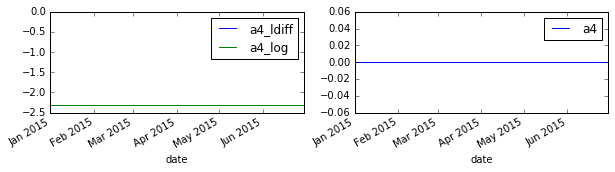

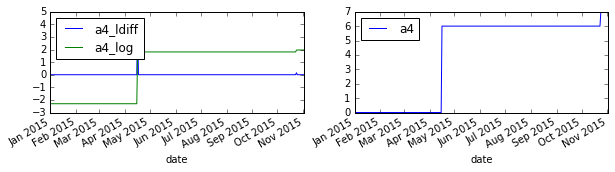

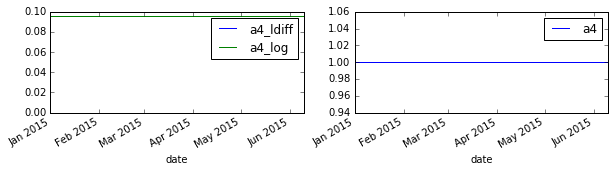

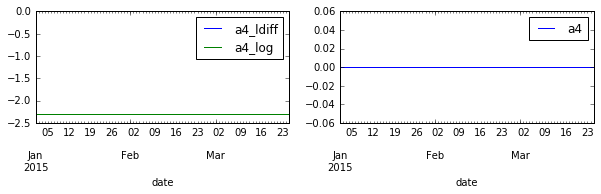

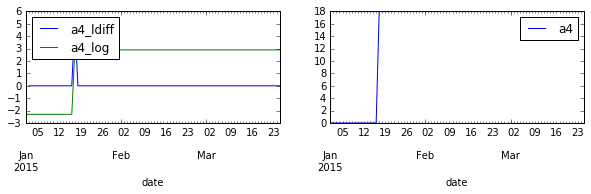

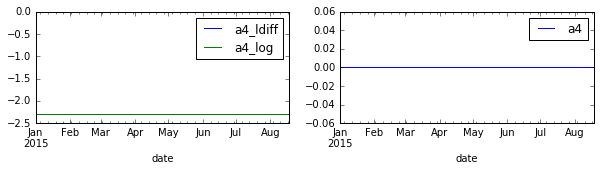

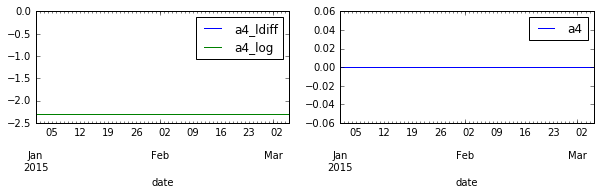

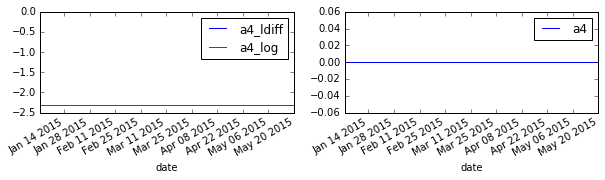

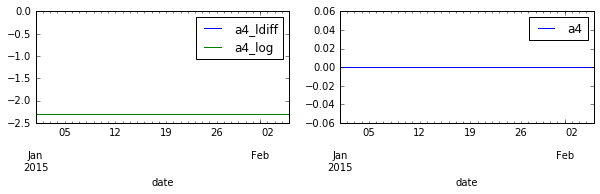

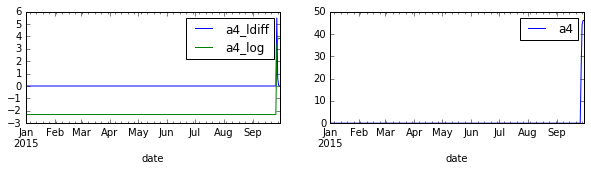

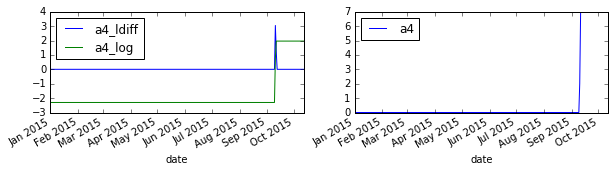

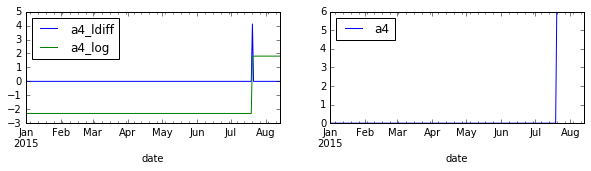

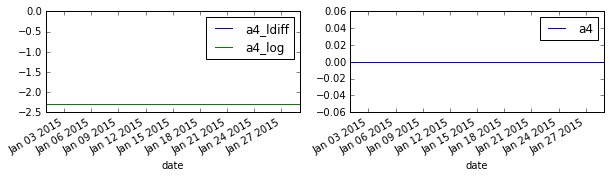

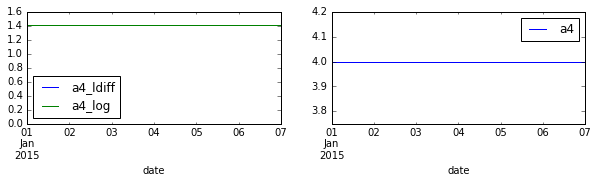

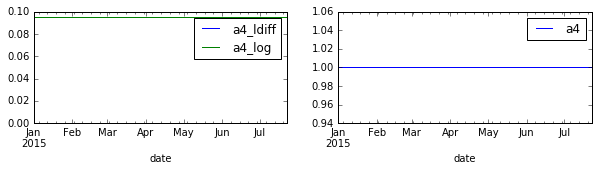

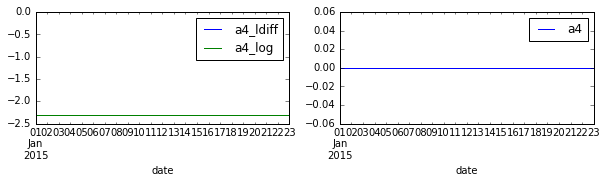

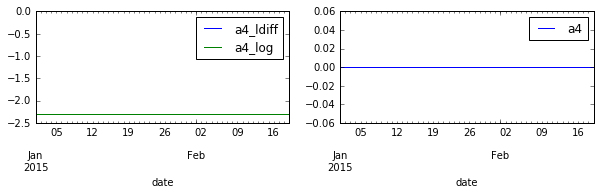

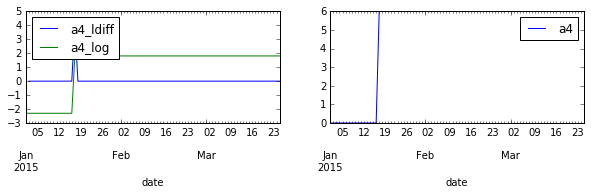

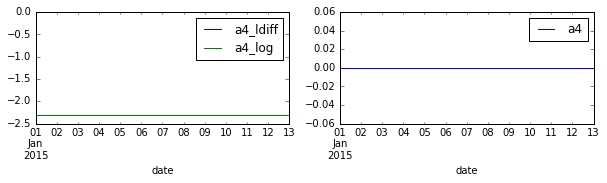

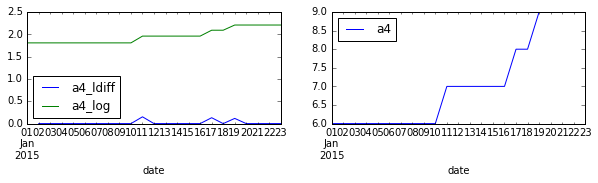

In [21]:
dd.plot_sample_history(mispredict_devs["device"],0)

## Summary
#### Good thing is a4 is significantly increasing recall (sensitivity)
#### Precision did go down a bit, but it's not that bad
#### Probably indicate that time to failure is a bit large once we detect failure
####     I do see signal in a4 for false positives.
#### This could turn out real good if we keep getting data from field to validate
#### Definitely inspect device and get more feedback from field